In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import LabelEncoder

In [3]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
combine = [train_df, test_df]
df_all = pd.concat([train_df,test_df],sort=True).reset_index(drop=True)

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()
print('_'*40)
print('Percentage of NA per property sorted') # train_df
print('--------')
p = (train_df.isna().sum()/len(train_df)*100).sort_values(ascending=False)
print(p)
print('--------')
print('Unique values for duplications and other useful info') # train_df
print('--------')
u = train_df.nunique().sort_values()
print(u)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
Percentage of NA per property sorted
--------
Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name   

In [6]:
test_df.info()
print('_'*40)
print('Percentage of NA per property sorted') # test_df
print('--------')
p = (test_df.isna().sum()/len(test_df)*100).sort_values(ascending=False)
print(p)
print('--------')
print('Unique values for duplications and other useful info') # test_df
print('--------')
u = test_df.nunique().sort_values()
print(u)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
________________________________________
Percentage of NA per property sorted
--------
Cabin          78.229665
Age            20.574163
Fare            0.239234
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000

In [7]:
print(train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))  
# as_index=False
# ascending
print('_'*40)
print(train_df[["Sex","Survived"]].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False))
print('_'*40)
print(train_df[["SibSp","Survived"]].groupby(['SibSp'],as_index=False).mean().sort_values(by="Survived",ascending=False))
print('_'*40)
print(train_df[["Parch","Survived"]].groupby(['Parch'],as_index=False).mean().sort_values(by="Survived",ascending=False))

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
________________________________________
      Sex  Survived
0  female  0.742038
1    male  0.188908
________________________________________
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
________________________________________
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


In [8]:

df_all_corr = df_all.corr().abs().unstack().sort_values(kind="quicksort",ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
0,Age,Age,1.000000
9,Age,Pclass,0.408106
18,Age,SibSp,0.243699
21,Age,Fare,0.178740
26,Age,Parch,0.150917
30,Age,Survived,0.077221
41,Age,PassengerId,0.028814


In [9]:

age_by_pclass_sex = df_all.groupby(['Sex','Pclass']).median()['Age']
df_all['Age'] = df_all.groupby(['Sex','Pclass'])['Age'].apply(lambda x:x.fillna(x.median()))

In [10]:
df_all[df_all['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


In [11]:
df_all['Embarked'] = df_all['Embarked'].fillna('S')

In [12]:
df_all[df_all['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [13]:
me_fare = df_all.groupby(['Pclass','Parch','SibSp']).Fare.median()[3][0][0] 
df_all['Fare']=df_all['Fare'].fillna(me_fare)

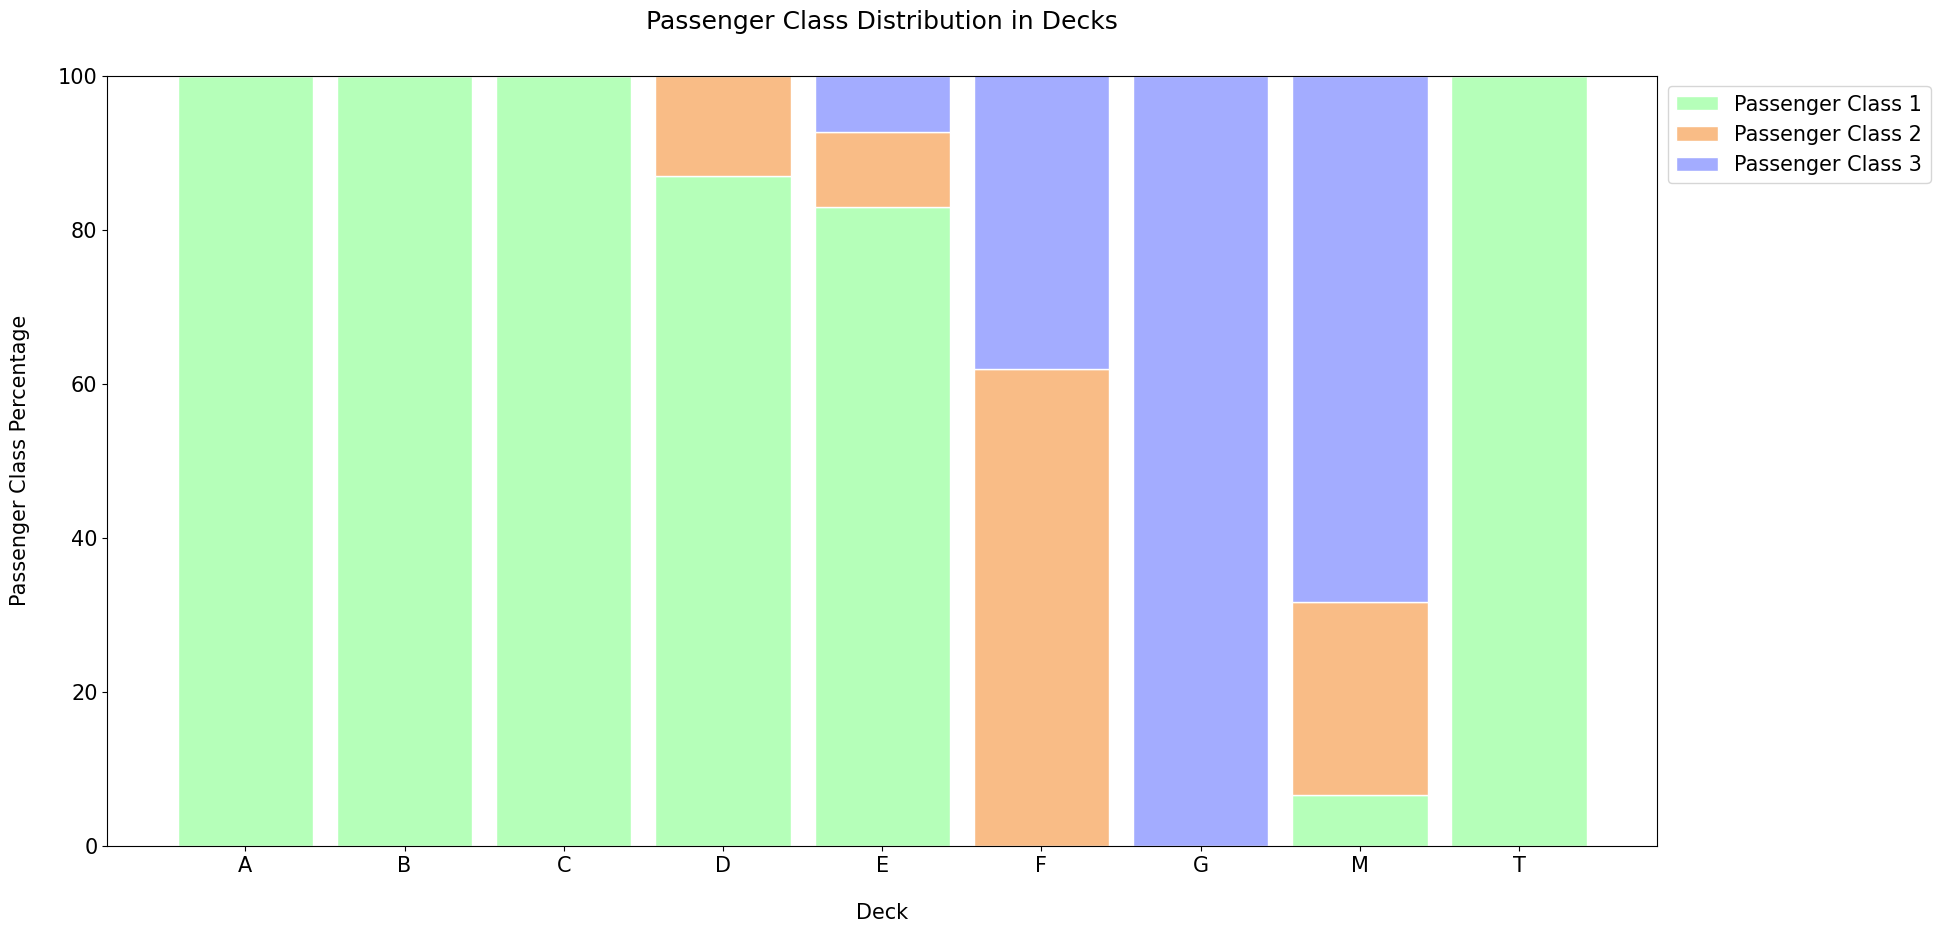

In [14]:
df_all['Deck'] = df_all['Cabin'].apply(lambda s:s[0] if pd.notnull(s) else 'M')
df_all_decks = df_all.groupby(['Deck','Pclass']).count().drop(columns=['Survived','Sex','Age','SibSp','Parch','Fare','Embarked','Cabin','PassengerId','Ticket']).rename(columns={'Name':'Count'}).transpose()

def get_pclass_dist(df):
    
    # Creating a dictionary for every passenger class count in every deck
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]    
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}

    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages

def display_pclass_dist(percentages):
    
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)   
    
    plt.show()  

all_deck_count, all_deck_per = get_pclass_dist(df_all_decks)
display_pclass_dist(all_deck_per)




In [15]:
idx = df_all[df_all['Deck']=='T'].index
df_all.loc[idx,'Deck']='A'

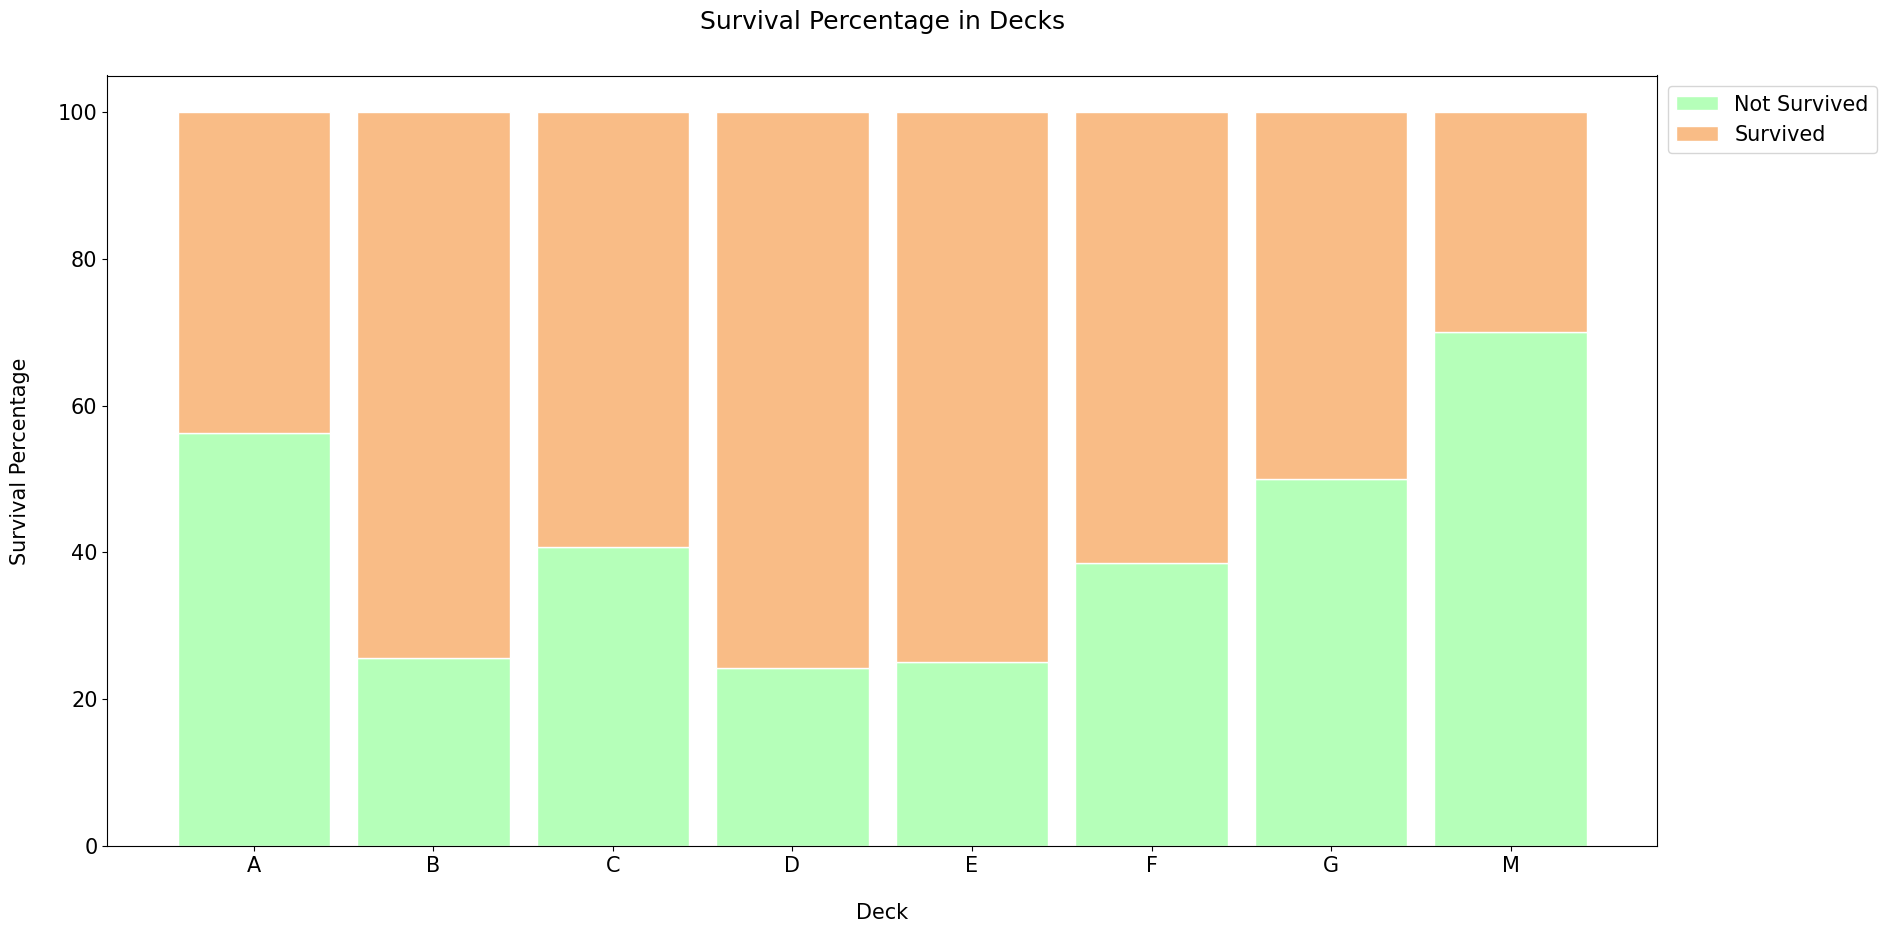

In [16]:
df_all_decks_survived = df_all.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                                                                                   'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

def get_survived_dist(df):
    surv_counts={'A':{},'B':{},'C':{},'D':{},'E':{},'F':{},'G':{},'M':{}}
    decks=df.columns.levels[0]

    for deck in decks:
        for survive in range(0,2):
            surv_counts[deck][survive]=df[deck][survive][0]
    
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    return surv_counts, surv_percentages

def display_surv_dist(percentages):
    
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85    

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, not_survived, color='#b5ffb9', edgecolor='white', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='#f9bc86', edgecolor='white', width=bar_width, label="Survived")
 
    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Survival Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Survival Percentage in Decks', size=18, y=1.05)
    
    plt.show()

all_surv_count, all_surv_per = get_survived_dist(df_all_decks_survived)
display_surv_dist(all_surv_per)


In [17]:
df_all['Deck']=df_all['Deck'].replace(['A','B','C'],'ABC')
df_all['Deck']=df_all['Deck'].replace(['D','E'],'DE')
df_all['Deck']=df_all['Deck'].replace(['F','G'],'FG')

df_all['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

In [18]:
df_train_corr = train_df.drop(['PassengerId'], axis=1).corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)

df_test_corr = test_df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_test_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_test_corr.drop(df_test_corr.iloc[1::2].index, inplace=True)
df_test_corr_nd = df_test_corr.drop(df_test_corr[df_test_corr['Correlation Coefficient'] == 1.0].index)

In [19]:
# Training set high correlations
corr = df_train_corr_nd['Correlation Coefficient'] > 0.1
df_train_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,Fare,Pclass,0.549500
8,Parch,SibSp,0.414838
10,Age,Pclass,0.369226
12,Survived,Pclass,0.338481
14,SibSp,Age,0.308247
16,Fare,Survived,0.257307
18,Fare,Parch,0.216225
20,Age,Parch,0.189119
22,SibSp,Fare,0.159651


In [20]:
# Test set high correlations
corr = df_test_corr_nd['Correlation Coefficient'] > 0.1
df_test_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,Fare,Pclass,0.577147
8,Pclass,Age,0.492143
10,Age,Fare,0.337932
12,Parch,SibSp,0.306895
14,Fare,Parch,0.230046
16,SibSp,Fare,0.171539


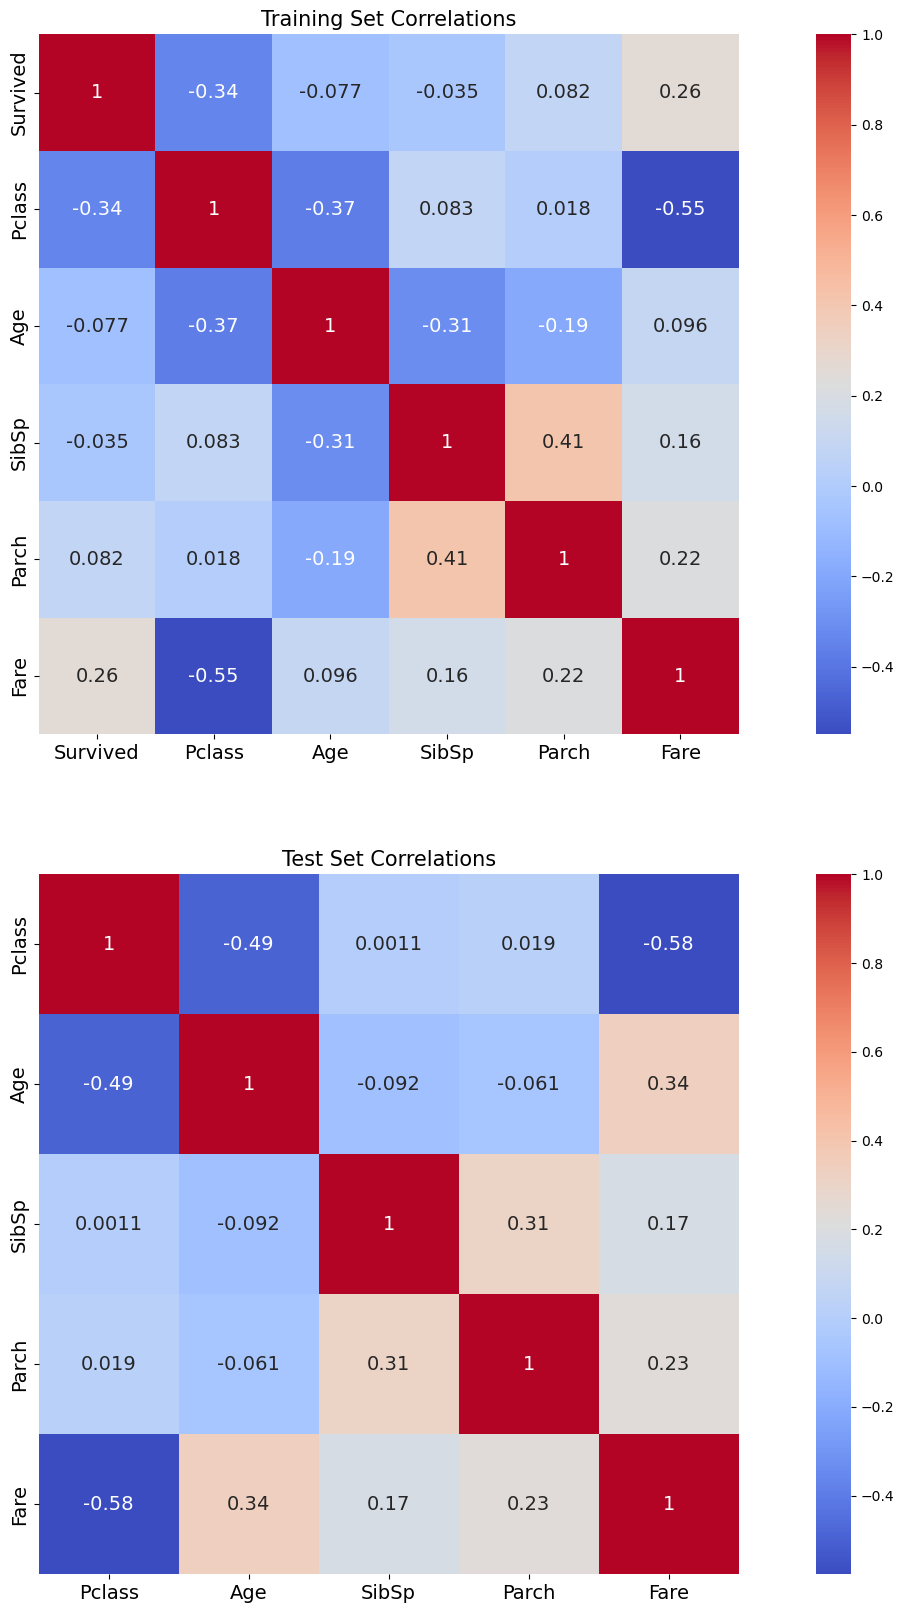

In [21]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))

sns.heatmap(train_df.drop(['PassengerId'], axis=1).corr(), ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
sns.heatmap(test_df.drop(['PassengerId'], axis=1).corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

for i in range(2):    
    axs[i].tick_params(axis='x', labelsize=14)
    axs[i].tick_params(axis='y', labelsize=14)
    
axs[0].set_title('Training Set Correlations', size=15)
axs[1].set_title('Test Set Correlations', size=15)

plt.show()

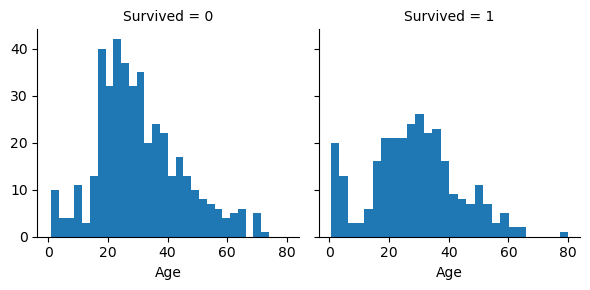

In [22]:
g = sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=28)

In [23]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size= 2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend()

TypeError: __init__() got an unexpected keyword argument 'size'

In [ ]:
grid = sns.FacetGrid(train_df,row='Embarked',size=2.2,aspect=1.6)
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

In [ ]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [ ]:
print("Before",train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df=train_df.drop(['Ticket','Cabin'],axis=1)
test_df=test_df.drop(['Ticket','Cabin'],axis=1)
combine=[train_df,test_df]

print("After",train_df.shape,test_df.shape, combine[0].shape, combine[1].shape)

In [ ]:
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_df.head()

In [ ]:
combine = [train_df, test_df]
train_df.shape, test_df.shape

In [ ]:
guess_ages = np.zeros((2,3))
guess_ages

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) &  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

        
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j] 

    dataset['Age'] = dataset['Age'].astype(int)


train_df.head()



In [ ]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

for dataset in combine:
    dataset.loc[dataset['Age']<=16,'Age']=0
    dataset.loc[(dataset['Age']>16)&(dataset['Age']<=32),'Age']=1
    dataset.loc[(dataset['Age']>32)&(dataset['Age']<=48),'Age']=2
    dataset.loc[(dataset['Age']>48)&(dataset['Age']<=64),'Age']=3
    dataset.loc[dataset['Age']>64,'Age']=4

train_df = train_df.drop(['AgeBand'],axis=1)
combine = [train_df, test_df]

train_df.head()

In [ ]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

# train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
# test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

In [ ]:
for dataset in combine:
    dataset['Age*Class']=dataset.Age * dataset.Pclass

train_df.loc[:,['Age*Class','Age','Pclass']].head()

In [ ]:
freq_port = train_df.Embarked.dropna().mode()[0]
print(freq_port)

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by="Survived",ascending=False)

train_df[['Embarked']]=train_df[['Embarked']].apply(LabelEncoder().fit_transform)
test_df[['Embarked']]=train_df[['Embarked']].apply(LabelEncoder().fit_transform)
train_df.head()

In [ ]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)
print(train_df.head())

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
features = ["Pclass", "Sex", "SibSp", "Parch"]
X_train = pd.get_dummies(train_df[features].fillna(-1))
X_test = pd.get_dummies(test_df[features].fillna(-1))
Y_train = train_df["Survived"]

In [ ]:
#decision_tree = DecisionTreeClassifier()
#decision_tree.fit(X_train, Y_train)
#Y_pred = decision_tree.predict(X_test)
#acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
#print("The accurancy of Decision Tree is",acc_decision_tree)

In [ ]:
 #final = RandomForestClassifier(n_estimators=100)
#final.fit(X_train, Y_train)
 #Y_pred = final.predict(X_test)
#final.score(X_train, Y_train)
#acc_random_forest = round(final.score(X_train, Y_train) * 100, 2)
 #print("The accuract of Randon Forest is",acc_random_forest)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection, metrics

In [ ]:
#rf0 = RandomForestClassifier(oob_score=True, random_state=10)
#rf0.fit(X_train,Y_train)
#print(rf0.oob_score_)
#Y_pred = rf0.predict(X_test)
#print("AUC Score (Train): %f" % metrics.roc_auc_score(Y_pred, Y_train))

In [ ]:
#param_test1 = {'n_estimators':range(10,71,10)}
#gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
 #                                  min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10), 
 #                       param_grid = param_test1, scoring='roc_auc',cv=5)
#gsearch1.fit(X_train,Y_train)
#gsearch1.cv_results_['mean_test_score'], gsearch1.cv_results_['params'],gsearch1.best_params_, gsearch1.best_score_

In [ ]:
param_test2 = {'max_depth':range(3,14,2), 'min_samples_split':range(50,201,20)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 60, 
                                   min_samples_leaf=20,max_features='sqrt' ,oob_score=True, random_state=10),
                         param_grid = param_test2, scoring='roc_auc', cv=5)
gsearch2.fit(X_train,Y_train)
Y_pred = gsearch2.predict(X_test)
acc = round(gsearch2.score(X_train, Y_train) * 100, 2)
print("The accuracy is",acc)
#gsearch2.cv_results_['mean_test_score'], gsearch2.cv_results_['params'],gsearch2.best_params_, gsearch2.best_score_

In [ ]:
#rf1 = RandomForestClassifier(n_estimators= 60, max_depth=9, min_samples_split=50,
 #                                 min_samples_leaf=20,max_features='sqrt' ,oob_score=True, random_state=10)
#rf1.fit(X_train,Y_train)
#print(rf1.oob_score_)

In [ ]:
#param_test3 = {'min_samples_split':range(80,150,20), 'min_samples_leaf':range(10,60,10)}
#gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 60, max_depth=9,
#                                   max_features='sqrt' ,oob_score=True, random_state=10),
#   param_grid = param_test3, scoring='roc_auc', cv=5)
#gsearch3.fit(X_train,Y_train)
#gsearch3.cv_results_['mean_test_score'], gsearch3.cv_results_['params'], gsearch3.best_params_, gsearch3.best_score_

In [ ]:
#param_test3 = 84.53
#param_test2 = 84.76
#param_test1 = 84.33
#rf1 = 80.58
#decisiontree = 81.71
#rf0 = 76.54
# final rf = 81.71

In [ ]:
output = pd.DataFrame({'PassengerId':test_df['PassengerId'], "Survived":Y_pred})
output.to_csv('my_submission.csv', index=False)

In [ ]:
output.head()